In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
image_filenames = glob.glob('./dataset/dc/train/*.jpg')
len(image_filenames)

25000

In [3]:
#25000 / 32

In [4]:
labels = list(map(lambda x: float(x.split('\\')[1].split('.')[0] == 'cat'), image_filenames))

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((image_filenames, labels))

In [6]:
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.string, tf.float32)>

In [7]:
def _pre_read(img_filename, label):
    image = tf.io.read_file(img_filename)
    image = tf.image.decode_jpeg(image, channels= 3)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image, (200, 200))
    image = tf.reshape(image, [200, 200, 1])
    #归一化，或者直接 / 255
    image = tf.image.per_image_standardization(image)
    label = tf.reshape(label, [1])
    return image, label

In [8]:
dataset = dataset.map(_pre_read)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [9]:
dataset = dataset.shuffle(300).repeat().batch(32)

In [10]:
dataset

<BatchDataset shapes: ((None, 200, 200, 1), (None, 1)), types: (tf.float32, tf.float32)>

In [11]:
model = keras.Sequential()

In [12]:
#MaxPooling和Conv2D的核不同，视野不同，能提高拟合效果。
model.add(layers.Conv2D(64, (3, 3), input_shape = (200, 200, 1), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        3

In [14]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [15]:
history = model.fit(dataset, epochs=10, steps_per_epoch=781)

Train for 781 steps
Epoch 1/10
781/781 [==============================] - 55s 70ms/step - loss: 0.0494 - acc: 0.9896
Epoch 2/10
781/781 [==============================] - 55s 70ms/step - loss: 0.1529 - acc: 0.9692
Epoch 3/10
781/781 [==============================] - 54s 70ms/step - loss: 0.1368 - acc: 0.9648
Epoch 4/10
781/781 [==============================] - 57s 73ms/step - loss: 0.1668 - acc: 0.9649
Epoch 5/10
781/781 [==============================] - 56s 71ms/step - loss: 0.1796 - acc: 0.9540
Epoch 6/10
781/781 [==============================] - 58s 74ms/step - loss: 0.2409 - acc: 0.9742
Epoch 7/10
781/781 [==============================] - 56s 72ms/step - loss: 0.2874 - acc: 0.9544
Epoch 8/10
781/781 [==============================] - 56s 71ms/step - loss: 0.3161 - acc: 0.9484
Epoch 9/10
781/781 [==============================] - 53s 68ms/step - loss: 0.2135 - acc: 0.9674
Epoch 10/10
781/781 [==============================] - 55s 71ms/step - loss: 0.2835 - acc: 0.9730


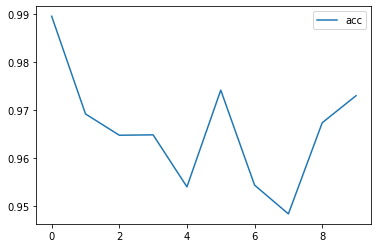

In [16]:
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.legend()